In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [317]:
data = pd.read_csv(r"C:\Users\dutta\Downloads\foetal_ecg.dat\text.csv", index_col = "time")
# data.columns = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
# time = np.arange(1,31001)/500
data.index = np.int64(data.index * 1000)
data.head(7)

,source1,source2,source3,source4,source5,source6,source7,source8
0,0.1446,1.4404,4.2689,-9.2554,-2.8426,0.2229,-2.565,-10.8490
4,-0.1554,0.1404,3.3689,-10.5550,-2.0426,-21.7770,-16.565,-6.8493
8,2.1446,0.5404,4.4689,-7.7554,0.1574,-3.7771,-8.565,-18.8490
12,1.9446,-2.2596,0.8689,-8.5554,0.4574,-11.7770,-20.565,-28.8490
16,3.3446,-0.7596,2.2689,-6.9554,1.6574,-9.7771,-26.565,-28.8490
20,3.0446,-2.3596,2.5689,-7.7554,1.6574,-5.7771,-32.565,-30.8490
24,4.1446,-3.8596,3.1689,-6.8554,1.8574,-13.7770,-40.565,-54.8490


In [318]:
scaler = StandardScaler(copy = False)
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 0.01261621,  0.09037515,  0.36666645, ..., -0.00502365,
        -0.01215984, -0.07615555],
       [-0.01922317,  0.01872764,  0.28917524, ..., -0.20361399,
        -0.11385586, -0.04517463],
       [ 0.22487874,  0.04077303,  0.38388672, ..., -0.04113114,
        -0.05574385, -0.13812205],
       ...,
       [-0.05106256,  0.01872764,  0.40110699, ...,  0.13940726,
         0.00236817,  0.15621883],
       [ 0.08690809,  0.06832976,  0.40971712, ...,  0.22967601,
        -0.02668784,  0.09425233],
       [ 0.21426562, -0.02536314,  0.35805632, ...,  0.26578351,
        -0.08479985,  0.04777513]])

In [319]:
nums = np.arange(1,data_scaled.shape[1]+1)
var_ratio = []
for i in nums:
  pca = FactorAnalysis(n_components=i)
  pca.fit(data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

AttributeError: 'FactorAnalysis' object has no attribute 'explained_variance_ratio_'

KeyError: 'y'

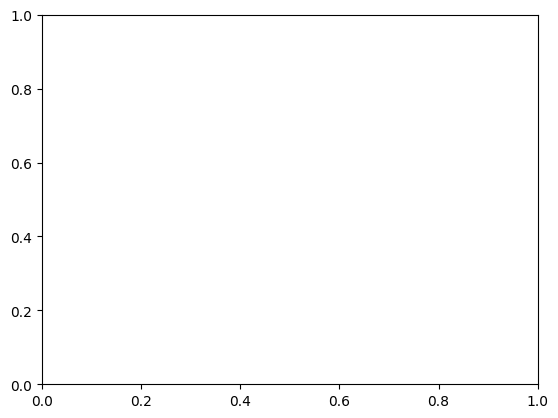

In [320]:
sns.lineplot(x = nums, y = var_ratio)

In [ ]:
list(enumerate(var_ratio))

In [336]:
num_of_comp = 8

In [337]:
pca_data = PCA(n_components=num_of_comp).fit_transform(data)
fa_data = FactorAnalysis(n_components=num_of_comp).fit_transform(data)
ica_data = DictionaryLearning(n_components=num_of_comp).fit_transform(data)

In [338]:
df = pd.DataFrame(ica_data, columns = [f"Source {i}" for i in range(1,num_of_comp + 1)])
df.head(20)

,Source 1,Source 2,Source 3,Source 4,Source 5,Source 6,Source 7,Source 8
0,0.0,0.0,0.0,0.0,0.0,0.335130,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.516090,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.192246,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.292220,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.118058,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.248547,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.214498,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.418264,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.174048,0.0,0.0


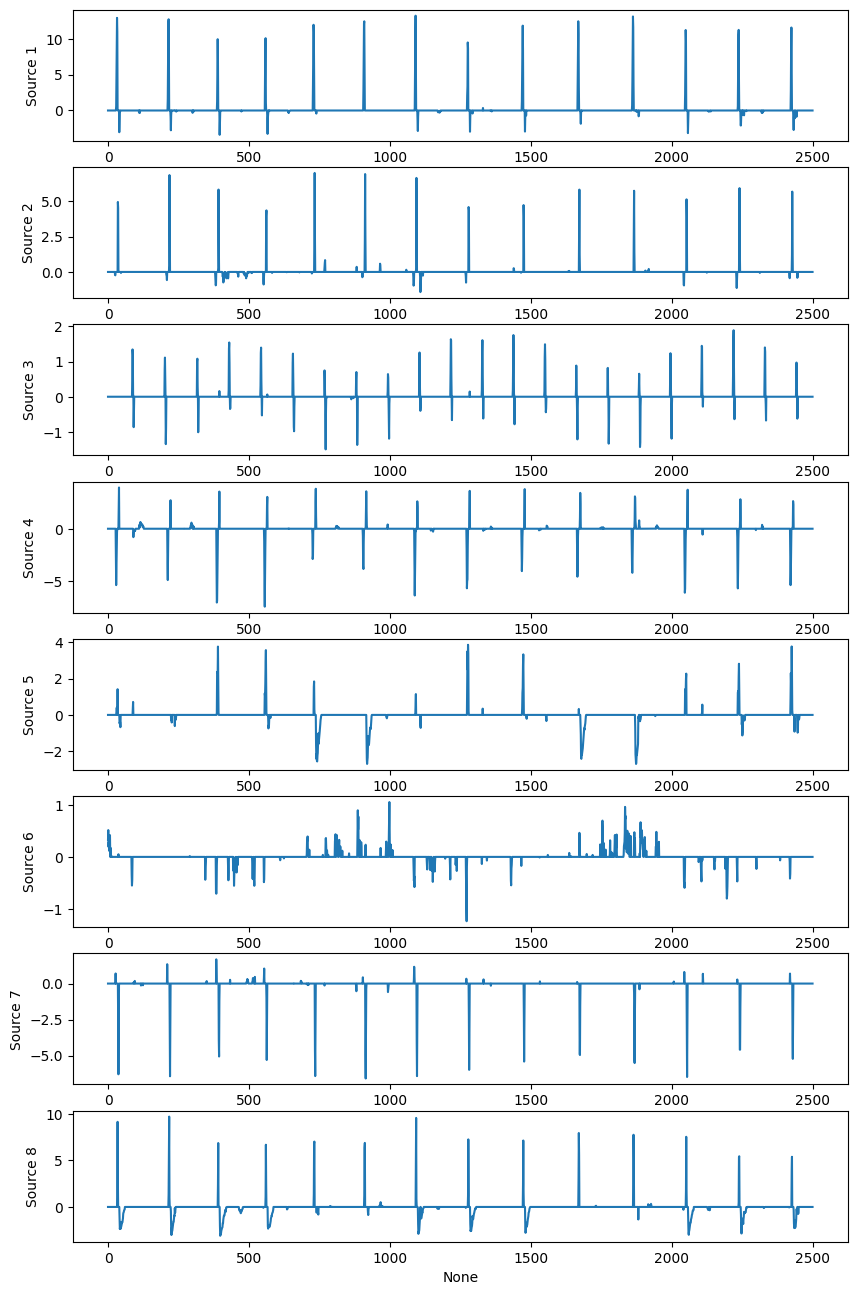

In [339]:
millisec = 5000
# plt.figure(figsize=)
fig, axs = plt.subplots(nrows=num_of_comp, figsize=(10,num_of_comp * 2))
for i in range(num_of_comp):
    # print(i)
    sns.lineplot(x = df.index[:millisec], y=df.iloc[:millisec,i],ax=axs[i])

In [314]:
col3=df["Source 3"]

In [ ]:
np.convolve(col